In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
papers_df = pd.read_csv("prepared_papers_for_analysis.csv")
papers_df.head()

,Title,domain,approach,dimensions,number_dimensions,metrics,paper_type,psychological,performance,behavioural,physiological
0,CryptoAR Wallet: A Blockchain Cryptocurrency W...,E-commerce/Business,Experiment,"trust, user-satisfaction",2,"user satisfaction scores, trust levels",mixed,1.0,NaN,NaN,NaN
1,How Should Automated Vehicles Interact with Pe...,Driving/AV,Experiment,"trust, safety,user-experience",3,"safety-level, trust-questionnaires, hedonic-qu...",mixed,1.0,NaN,NaN,NaN
2,A Fluid Human Interactive Proof in Virtual Env...,E-commerce/Business,Experiment,"user-experience, reliability\n",2,"self-rating, head-orientation, cursor- travel ...",mixed,1.0,1.0,1.0,NaN
3,AI-Assisted Affective Computing and Spatial Au...,HCI,Experiment,"user-experience, scalability, reliability\n",3,"heart rate, GSR, circumplex model, QoE",mixed,1.0,NaN,NaN,1.0
4,"""You Better Eat to Survive"": Exploring Coopera...",Entertainment,Experiment,user-experience,1,"flow ratings, competence ratings, immersion ra...",mixed,1.0,NaN,NaN,NaN


In [4]:
papers_df.dtypes

Title                 object
domain                object
approach              object
dimensions            object
number_dimensions      int64
metrics               object
paper_type            object
psychological        float64
performance          float64
behavioural          float64
physiological        float64
dtype: object

In [4]:
# List of columns in which to replace NaN with 0
columns_to_replace = ['psychological', 'performance', 'behavioural', 'physiological']

# Replace NaN with 0 in selected columns
papers_df[columns_to_replace] = papers_df[columns_to_replace].fillna(0)

In [6]:
papers_df.head()

,Title,domain,approach,dimensions,number_dimensions,metrics,paper_type,psychological,performance,behavioural,physiological
0,CryptoAR Wallet: A Blockchain Cryptocurrency W...,E-commerce/Business,Experiment,"trust, user-satisfaction",2,"user satisfaction scores, trust levels",mixed,1.0,0.0,0.0,0.0
1,How Should Automated Vehicles Interact with Pe...,Driving/AV,Experiment,"trust, safety,user-experience",3,"safety-level, trust-questionnaires, hedonic-qu...",mixed,1.0,0.0,0.0,0.0
2,A Fluid Human Interactive Proof in Virtual Env...,E-commerce/Business,Experiment,"user-experience, reliability\n",2,"self-rating, head-orientation, cursor- travel ...",mixed,1.0,1.0,1.0,0.0
3,AI-Assisted Affective Computing and Spatial Au...,HCI,Experiment,"user-experience, scalability, reliability\n",3,"heart rate, GSR, circumplex model, QoE",mixed,1.0,0.0,0.0,1.0
4,"""You Better Eat to Survive"": Exploring Coopera...",Entertainment,Experiment,user-experience,1,"flow ratings, competence ratings, immersion ra...",mixed,1.0,0.0,0.0,0.0


In [59]:
papers_df[['Title','number_dimensions', 'metrics']]

,Title,number_dimensions,metrics
0,CryptoAR Wallet: A Blockchain Cryptocurrency W...,2,"user satisfaction scores, trust levels"
1,How Should Automated Vehicles Interact with Pe...,3,"safety-level, trust-questionnaires, hedonic-qu..."
2,A Fluid Human Interactive Proof in Virtual Env...,2,"self-rating, head-orientation, cursor- travel ..."
3,AI-Assisted Affective Computing and Spatial Au...,3,"heart rate, GSR, circumplex model, QoE"
4,"""You Better Eat to Survive"": Exploring Coopera...",1,"flow ratings, competence ratings, immersion ra..."
5,Finally on Par?! Multimodal and Unimodal Inter...,3,"completion-rate, count of actions, presence, flow"
6,Augmented Reality Head-Up Display: A Visual Su...,3,"take-over time, take over quality, trust rating,"
7,Seeing is Believing: Improving the Perceived T...,1,trust score
8,Behavioral Presence Test in Threatening Virtua...,1,presence score
9,The Influence of Avatar Representation and Beh...,7,"presence score, movement tracking"


In [63]:
papers_df['metrics'][50]= ','

C:\Users\aatog\AppData\Local\Temp\ipykernel_2000\3247933618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  papers_df['metrics'][50]= ','


In [5]:
# Convert columns to string data type
columns_to_convert = ['psychological', 'performance', 'behavioural', 'physiological']
papers_df[columns_to_convert] = papers_df[columns_to_convert].astype(int)

In [6]:
papers_df['number_dimensions'] = papers_df['number_dimensions'].astype(int)

In [36]:
papers_df.dtypes

Title                object
domain               object
approach             object
dimensions           object
number_dimensions     int32
metrics              object
paper_type           object
psychological         int32
performance           int32
behavioural           int32
physiological         int32
dtype: object

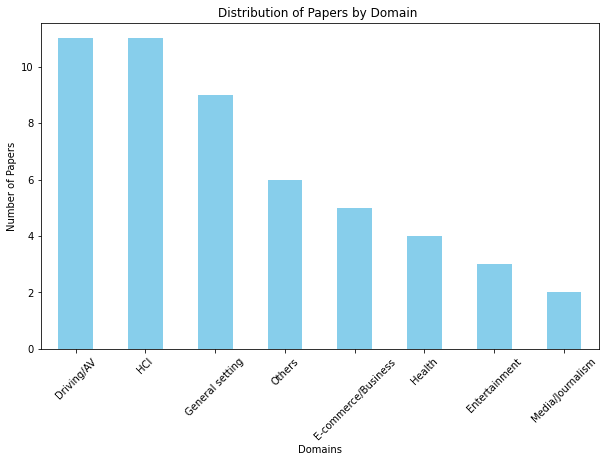

In [21]:
# Count the occurrences of each domain
domain_counts = papers_df['domain'].value_counts()
# Group values with counts less than 2 into an "Other" category
threshold = 2
small_counts = domain_counts[domain_counts < threshold]
domain_counts['Others'] = small_counts.sum()
domain_counts = domain_counts[domain_counts >= threshold]

# Sort the domain counts in descending order
domain_counts = domain_counts.sort_values(ascending=False)

# Create a bar chart
ax = plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
domain_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Papers by Domain ')
plt.xlabel('Domains')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [23]:
ax.savefig('domain_distribution.png', bbox_inches='tight')

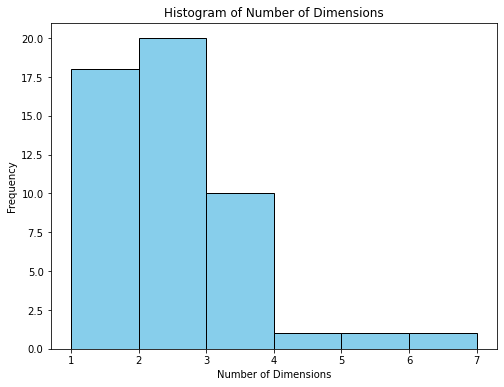

In [39]:
# Create a histogram for the 'number_dimensions' column
ax1 = plt.figure(figsize=(8, 6)) 
plt.hist(papers_df['number_dimensions'], bins=6, color='skyblue', edgecolor='black')
plt.title('Histogram of Number of Dimensions')
plt.xlabel('Number of Dimensions')
plt.ylabel('Frequency')

plt.show()

In [40]:
ax1.savefig('dimensions_distribution.png', bbox_inches='tight')

<Figure size 720x720 with 0 Axes>

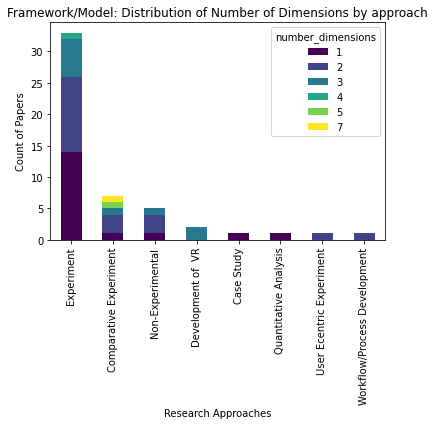

In [83]:
# Count the occurrences of each combination of 'approach' and 'number_dimensions'
grouped_data = papers_df.groupby(['approach', 'number_dimensions']).size().unstack(fill_value=0)

# Sort the 'approach' categories by count in descending order
grouped_data = grouped_data.sum(axis=1).sort_values(ascending=False).index
grouped_data = grouped_data[0:5]  # Limit to the top 5 categories if needed

# Reorder the DataFrame based on the sorted 'approach' categories
grouped_data = papers_df.groupby(['approach', 'number_dimensions']).size().unstack(fill_value=0)
grouped_data = grouped_data.loc[grouped_data.index.isin(grouped_data.index.intersection(grouped_data.index.get_level_values('approach').unique().tolist()))]

# Create a stacked bar chart
ax2 =plt.figure(figsize=(10, 10))  # Adjust the figure size if needed
grouped_data.loc[grouped_data.index.isin(grouped_data.index.get_level_values('approach').unique().tolist())].loc[grouped_data.loc[grouped_data.index.isin(grouped_data.index.get_level_values('approach').unique().tolist())].sum(axis=1).sort_values(ascending=False).index].plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Framework/Model: Distribution of Number of Dimensions by approach')
plt.xlabel('Research Approaches')
plt.ylabel('Count of Papers')
plt.savefig("research framework.png", bbox_inches='tight')
plt.show();

In [81]:
ax2.savefig("research framework.png", bbox_inches='tight')

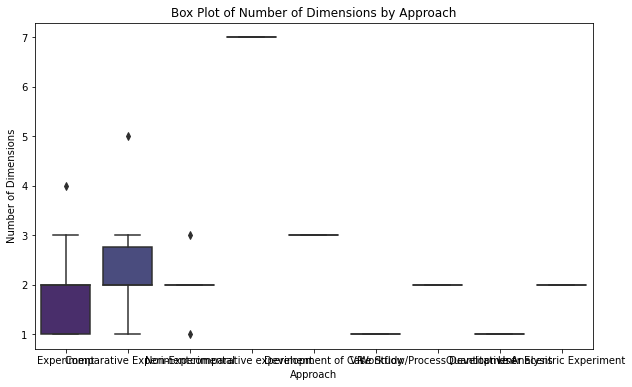

In [44]:
# Create a box plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.boxplot(x='approach', y='number_dimensions', data=papers_df, palette='viridis')
plt.title('Box Plot of Number of Dimensions by Approach')
plt.xlabel('Approach')
plt.ylabel('Number of Dimensions')

plt.show()

In [46]:
# Combine all dimensions into a single text string
text = ' '.join(papers_df['dimensions'])
text

'trust, user-satisfaction trust, safety,user-experience user-experience, reliability\n user-experience, scalability, reliability\n user-experience usability, presence, flow trust, usability, attention trust presence user-feedback, visual-realism, behavioural-realism, social-cues, consistency, responsivenesss, contextual-fit trustworthiness, reliability,validity validity, reliability, user experience trust, presence  trust novelty, reliability, user experience technical-details validity reliability, user experience reliability, user experience trust user experience, Empathy, Accuracy, Emotion\n safety, trust, presence  presence, flow, empathy, understanding  user experience, usability\n trust, realism trust, user-perception trust presence trust trust user-perception, trust trust, technical-details usability, security trust validity, reliability, sensitivity presence, reliability trust validity, reliability, trust, presence, anxiety validity, reliability trust, user experience, cybersick

(-0.5, 799.5, 399.5, -0.5)

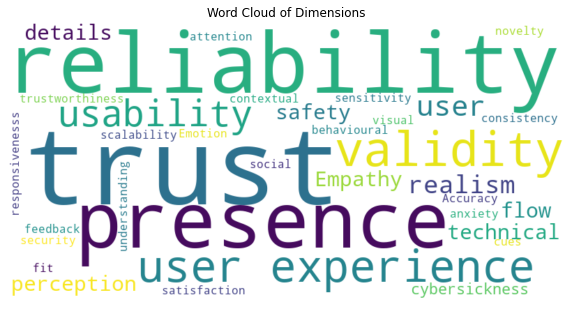

In [53]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
ax3 = plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Dimensions')
plt.axis('off')

In [52]:
ax3.savefig("wordcloud_dimensions.png", bbox_inches='tight' )

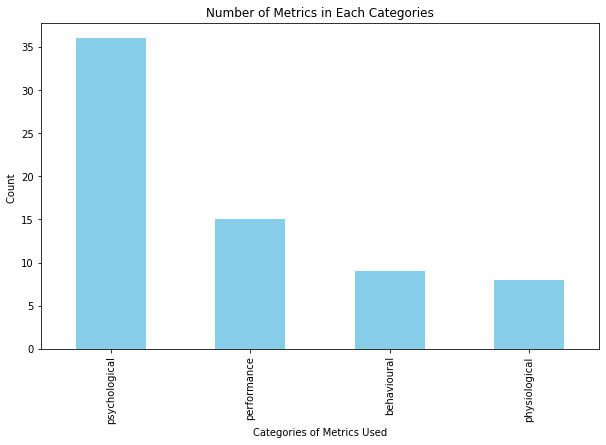

In [9]:
# Count the number of 'yes' (1) values in each column
counts = papers_df[['psychological', 'performance', 'behavioural', 'physiological']].sum()

# Create a bar chart
ax6 = plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
counts.plot(kind='bar', color='skyblue')
plt.title('Number of Metrics in Each Categories')
plt.xlabel('Categories of Metrics Used')
plt.ylabel('Count ')

plt.show()


In [10]:
ax6.savefig("metrics.png", bbox_inches="tight")

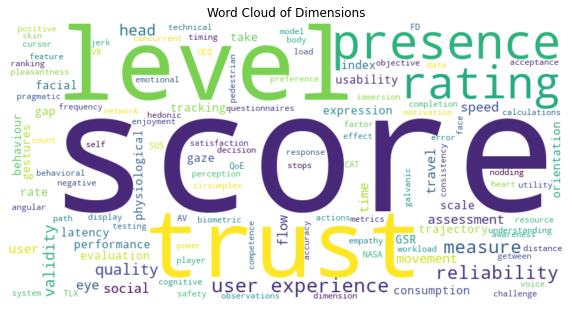

In [66]:
# Combine all dimensions into a single text string
text = ' '.join(papers_df['metrics'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
ax4 =plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Dimensions')
plt.axis('off')

plt.show()

In [67]:
ax4.savefig('dimensons.png')

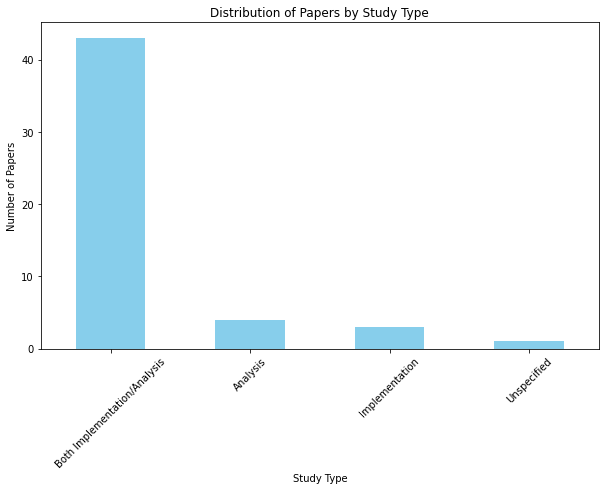

In [96]:
# Count the occurrences of each paper type
domain_counts = papers_df['paper_type'].value_counts()

# Sort the paper type counts in descending order
domain_counts = domain_counts.sort_values(ascending=False)

# Define custom x-axis labels
custom_labels = ['Both Implementation/Analysis', 'Analysis', 'Implementation', 'Unspecified']

# Create a bar chart
ax5 = plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
domain_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Papers by Study Type')
plt.xlabel('Study Type')
plt.ylabel('Number of Papers')# Set custom x-axis labels
plt.xticks(range(len(custom_labels)), custom_labels, rotation=45)

plt.show()

In [98]:
ax5.savefig("study_type.png", bbox_inches='tight')